In [2]:

import os

from pathlib import Path
from collections import defaultdict
import itertools
import duckdb
import numpy as np
import pandas as pd
import igraph as ig
import seaborn as sns
from event import Event

from dotenv import load_dotenv

load_dotenv()
pd.set_option('display.max_rows', 20)

sns.set_style('darkgrid')

PROJECT_DIR = Path("~/tramita").expanduser()
DB_PATH = PROJECT_DIR / os.getenv("SILVER_DUCKDB_PATH", "")
OUT_DIR = PROJECT_DIR / "gold" / "outputs"
OUT_DIR.mkdir(exist_ok=True)
ACCESS_DIR = PROJECT_DIR / "gold" / "accessory_data"
ACCESS_DIR.mkdir(exist_ok=True)

NODES_PATH_PARQUET = OUT_DIR / "nodes.parquet"
EDGES_PATH_PARQUET = OUT_DIR / "edges.parquet"
NODES_PATH_CSV = OUT_DIR / "nodes.csv"
EDGES_PATH_CSV = OUT_DIR / "edges.csv"

# with duckdb.connect(DB_PATH, read_only=True) as con:

COLLAB_NODES_CSV = OUT_DIR / "nodes_collab.csv"
COLLAB_EDGES_CSV = OUT_DIR / "edges_collab.csv"

In [5]:
node_df = pd.read_pickle(ACCESS_DIR / "node_consolidated_df.pkl")
edge_df = pd.read_pickle(ACCESS_DIR / "edge_consolidated_df.pkl")

In [12]:
bill_author_df = node_df[node_df['bigtype'].eq('bill')].join(
    edge_df.groupby('to').agg(n_authors=('from', 'count')),
    on="name",
).copy()
bill_author_df

,name,label,partido,type,score,bigtype,billtype,cod_partido,uf,ideol_partido,score_label,regiao,n_authors
0,CP:2187087,PL 5029/2019,,Proposicao,1.00,bill,PL,not_applicable,,none,floor-2,none,4
1,CP:2190408,PL 2/2019,,Proposicao,0.25,bill,PL,not_applicable,,none,committee-1,none,1
2,CP:2190417,PL 10/2019,,Proposicao,0.25,bill,PL,not_applicable,,none,committee-1,none,1
3,CP:2190423,PL 15/2019,,Proposicao,0.00,bill,PL,not_applicable,,none,filed,none,8
4,CP:2190450,PL 21/2019,,Proposicao,0.25,bill,PL,not_applicable,,none,committee-1,none,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29098,SP:8753534,PLP 207/2024,,Processo,0.00,bill,PLP,not_applicable,,none,filed,none,1
29099,SP:8757436,PL 4629/2024,,Processo,0.00,bill,PL,not_applicable,,none,filed,none,1
29100,SP:8769092,PL 4813/2024,,Processo,0.00,bill,PL,not_applicable,,none,filed,none,1
29101,SP:8771203,PL 4833/2024,,Processo,0.00,bill,PL,not_applicable,,none,filed,none,1


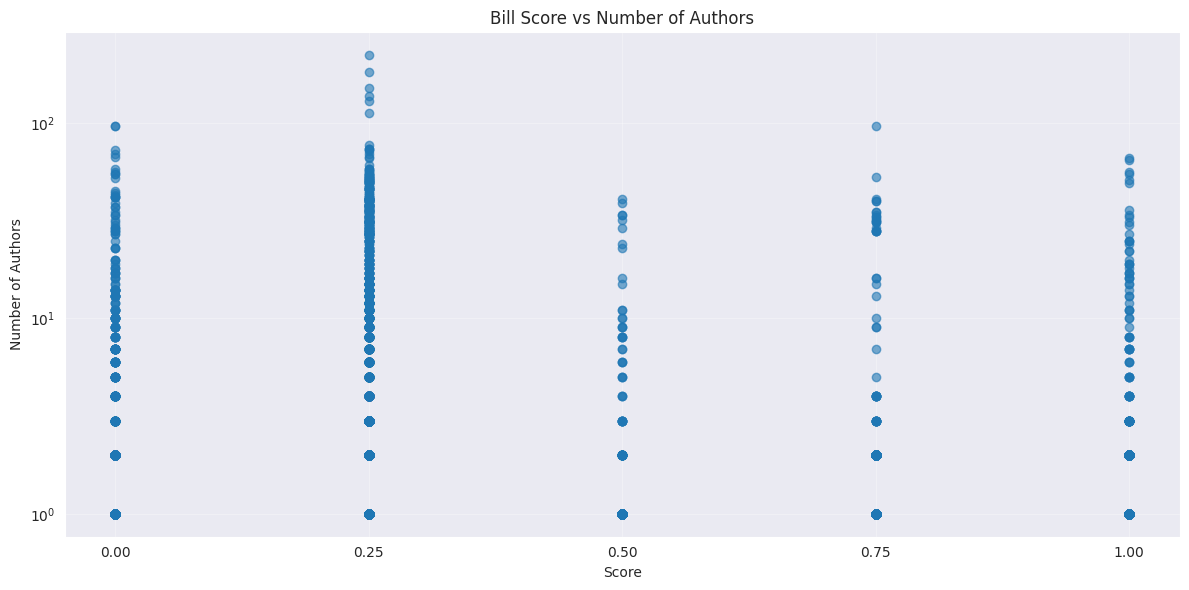

In [15]:
!pip install plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/9.9 MB ? eta -:--:--Downloading plotly-6.4.0-py3-none-any.whl (9.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 42.0 MB/s  0:00:00m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 42.0 MB/s  0:00:00
